# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

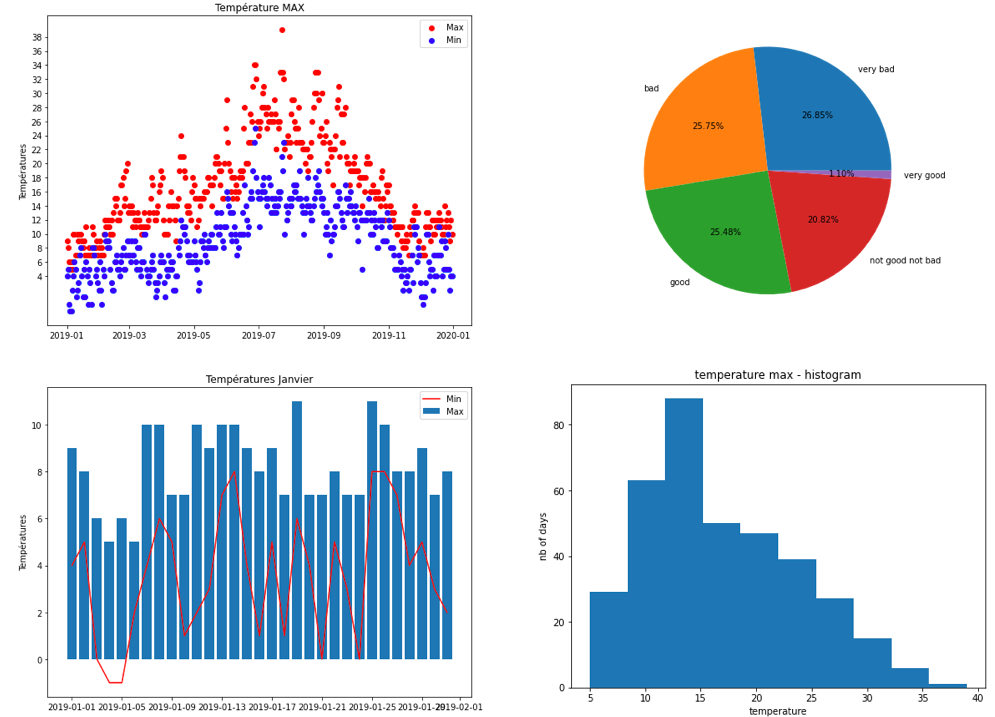

In [ ]:
# Complete the code below :
df_opinion = df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?
df_opinion

In [ ]:
# Calculer le nombre de jours pour chaque température MAX

df_days_max = df_weather["MAX_TEMPERATURE_C"].value_counts() 
df_days_max.index.sort_values()
df_days_max

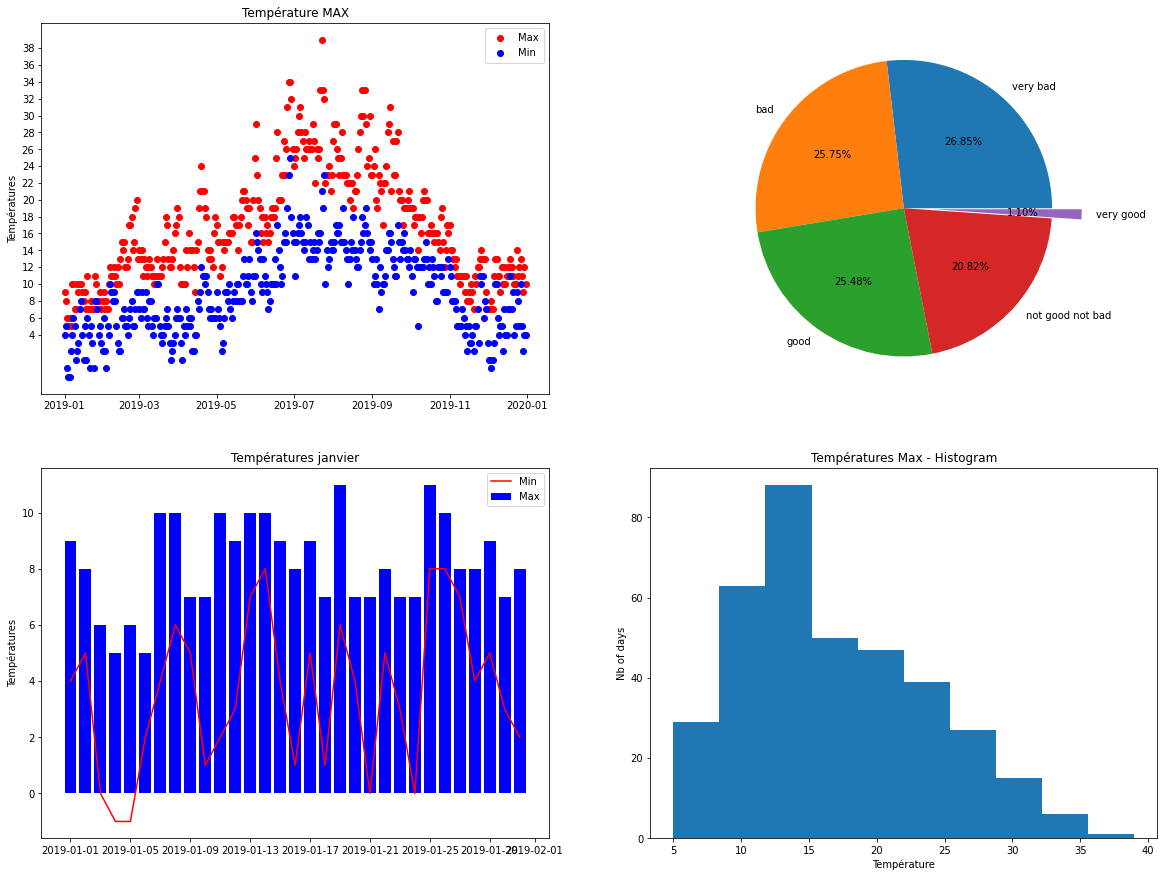

In [ ]:
fig, ax = plt.subplots(figsize = (20, 15))

# Graphique 1 : Nuage de points
ax1 = plt.subplot(221)
a = plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red')
b = plt.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue')
plt.legend([a, b], ["Max", "Min"], loc = 'upper right', ncol = 1, scatterpoints = 1, frameon = True, borderpad = 0.5, labelspacing = 0.5)
ax1.set_title('Température MAX')
ax1.set_ylabel('Températures')
ax1.set_yticks(range(4, 40, 2))

# Graphique 2 = Camembert
ax2 = plt.subplot(222)
labels = 'very bad', 'bad', 'good', 'not good not bad', 'very good'
explode = (0, 0, 0, 0, 0.2) # pour sortir un angle du camambert
plt.pie(df_opinion, explode = explode, labels = labels, autopct = '%1.2f%%') # -->  %1.2f%% afficher 2 chiffres après la virgule sur le camembert

# Graphique 3 : Barres
ax3 = plt.subplot(223)
df_janvier = df_weather[(df_weather["DATE"] >= '2019-01-01') & (df_weather["DATE"] <= '2019-01-31')]
plt.bar(df_janvier["DATE"], df_janvier["MAX_TEMPERATURE_C"], color ='blue', label='Max')
plt.plot(df_janvier["DATE"], df_janvier["MIN_TEMPERATURE_C"], color ='red',label='Min')
plt.legend(loc = 'upper right')
ax3.set_title('Températures janvier')
ax3.set_ylabel('Températures')


# Graphique 4 : Histogramme
ax4 = plt.subplot(224)
plt.hist(df_weather["MAX_TEMPERATURE_C"], bins = 10)
ax4.set_title('Températures Max - Histogram')
ax4.set_xlabel('Température')
ax4.set_ylabel('Nb of days')

plt.show()


## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

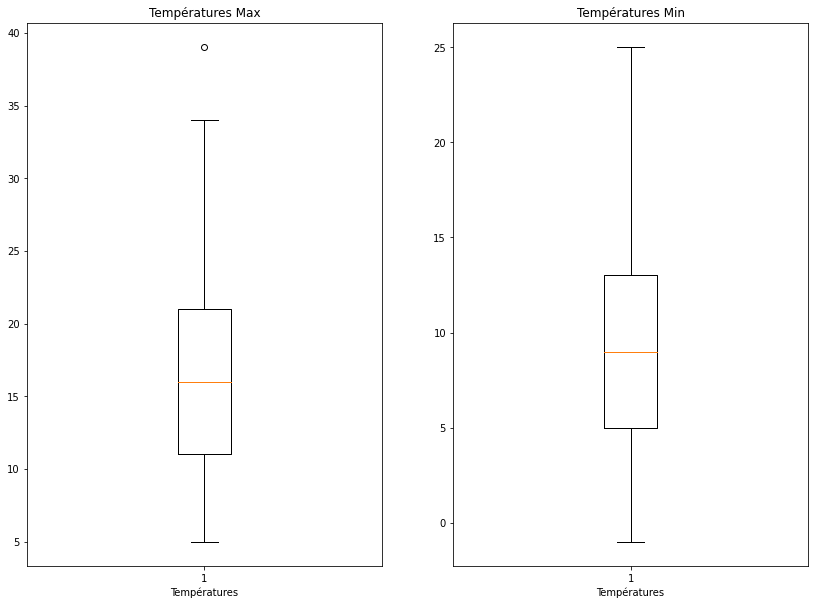

In [ ]:
# Your code here :

fig, ax = plt.subplots(figsize = (14, 10))
ax5 = plt.subplot(121)
ax5.boxplot(df_weather.MAX_TEMPERATURE_C)
ax5.set_title("Températures Max")
ax5.set_xlabel("Températures")

ax6 = plt.subplot(122)
ax6.boxplot(df_weather.MIN_TEMPERATURE_C)
ax6.set_title("Températures Min")
ax6.set_xlabel("Températures")

plt.show()

Il y a un outlier pour la température Max --> à 39°C.

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

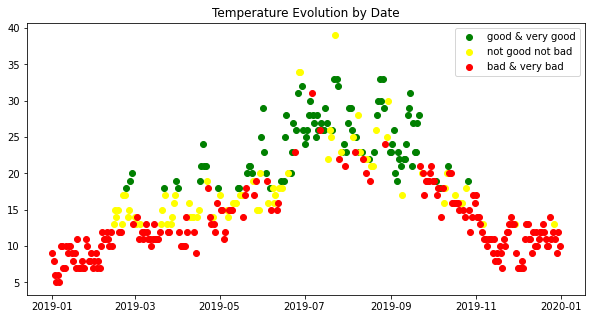

In [ ]:
# It's your turn now :

# Construire les différents groupes d'opinions :
df_weather['OPINION'].value_counts()

very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: OPINION, dtype: int64

In [ ]:
# Sélectionner les 'good' et 'very good' :

df_good = (df_weather['OPINION'] == 'good') | (df_weather['OPINION'] == 'very good')
df_weather[df_good]

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
53,2019-02-23,18,8,good
56,2019-02-26,19,7,good
57,2019-02-27,20,9,good
80,2019-03-22,18,6,good
89,2019-03-31,19,7,good
...,...,...,...,...
263,2019-09-21,28,17,good
275,2019-10-03,19,9,good
278,2019-10-06,18,12,good
284,2019-10-12,21,13,good


In [ ]:
# Sélectionner les "not good not bad" :

df_not_good_not_bad = (df_weather['OPINION'] == 'not good not bad') 
df_weather[df_not_good_not_bad]

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
44,2019-02-14,13,2,not good not bad
45,2019-02-15,15,6,not good not bad
46,2019-02-16,14,6,not good not bad
47,2019-02-17,15,7,not good not bad
50,2019-02-20,13,4,not good not bad
...,...,...,...,...
294,2019-10-22,16,8,not good not bad
297,2019-10-25,18,11,not good not bad
309,2019-11-06,13,7,not good not bad
332,2019-11-29,13,8,not good not bad


In [ ]:
# Sélectionner les bad :

df_bad = (df_weather['OPINION'] == 'bad') | (df_weather['OPINION'] == 'very bad')
df_weather[df_bad]

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad
...,...,...,...,...
359,2019-12-26,12,5,very bad
361,2019-12-28,11,5,very bad
362,2019-12-29,9,2,very bad
363,2019-12-30,12,4,very bad


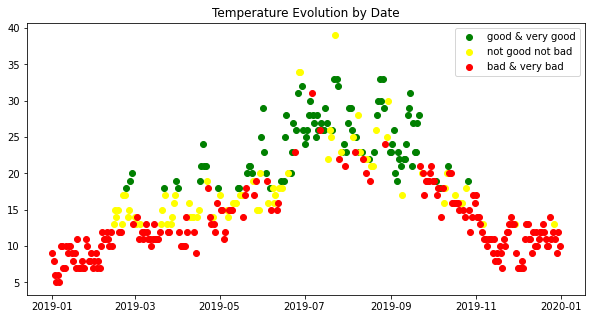

In [ ]:
# Elaboration du graphique :

plt.figure(figsize = (10, 5))
plt.scatter(x = df_weather[df_good]['DATE'], y = df_weather[df_good]["MAX_TEMPERATURE_C"], c= 'green', label = 'good & very good')
plt.scatter(x = df_weather[df_not_good_not_bad]['DATE'], y = df_weather[df_not_good_not_bad]["MAX_TEMPERATURE_C"], c= 'yellow', label = 'not good not bad')
plt.scatter(x = df_weather[df_bad]['DATE'], y = df_weather[df_bad]["MAX_TEMPERATURE_C"], c= 'red', label = 'bad & very bad')
plt.title('Temperature Evolution by Date')
plt.legend(loc = 'upper right')

plt.show()